In [151]:
def normalize(word_count):
    freq = dict(zip(list(word_count.keys()),[0] * len(word_count)))
    freq_sum = sum(list(word_count.values()))
    # print(freq_sum)
    for k,v in word_count.items():
        freq[k] = v/freq_sum
        if v == 0:
            freq[k] = 1e-9
    return freq

def count(file_name,word_list):
    word_dict = dict(zip(word_list,[0] * len(word_list)))
    with open(file_name,encoding="UTF-8") as fp1:
        lines = fp1.readlines()
        for ln in lines:
            ln.strip()
            for ch in ln:
                if ch in word_dict:
                    word_dict[ch] += 1
    return word_dict
    
word_list = ["之", "其", "或", "亦", "方", "于", "即", "皆",
             "因", "仍", "故", "尚", "呢", "了", "的", "着",
             "一", "不", "乃", "呀", "吗", "咧", "啊", "把",
             "让", "向", "往", "是", "在", "越", "再", "更",
             "比", "很", "偏", "别", "好", "可", "便", "就",
             "但", "儿", "又", "也", "都", "要", "这", "那",
             "你", "我", "他", "来", "去", "道", "笑", "说"]
# 统计词频
count_list = []
for i in range(3):
    count_list.append(count("p"+str(i+1)+".txt",word_list))
    #print(count_list[i])
    
# 词频归一化
freq_list = []
for i in range(3):
    freq_list.append(normalize(count_list[i]))
    # print(freq_list[i])
    

In [94]:
# a = sorted(count_list[0].items(),key=lambda x:x[1],reverse=True)
# b = sorted(freq_list[0].items(),key=lambda x:x[1],reverse=True)
# # for k,v in a:
# #     print("%s : %d"%(k,v))
# # for k,v in b:
# #     print("%s : %f"%(k,v))

In [95]:
import math
# 计算KL距离
def compute_KL_distance(p,q,word_list):
    distance = 0
    for w in word_list:
        distance += p[w] * math.log(p[w]/q[w],2)
        
    return distance

# # 计算对称距离
# def compute_sym_distance(p,q,word_list):
#     distance = 0
#     kld1 = compute_KL_distance(p,q,word_list)
#     kld2 = compute_KL_distance(q,p,word_list)
    
#     return (kld1+kld2)/2
    
# 计算归一化距离
def compute_distance(freq_list):
    length = len(freq_list)
    
    # KL距离表
    kld_matrix = [[0 for i in range(length)] for j in range(length)]
    # 对称距离表
    smd_matrix = [[0 for i in range(length)] for j in range(length)]
    # 归一化距离表
    nmd_matrix = [[0 for i in range(length)] for j in range(length)]
    
    kld_sum = 0
    for p in range(len(freq_list)):
        for q in range(p,len(freq_list)):
            # 计算p对q和q对p的KL距离
            klpq = compute_KL_distance(freq_list[p],freq_list[q],word_list)
            klqp = compute_KL_distance(freq_list[q],freq_list[p],word_list)
            # KL距离表赋值
            kld_matrix[p][q] = klpq
            kld_matrix[q][p] = klqp
            
            # 对称距离表赋值
            kld_2avg = (klpq + klqp)/2
            smd_matrix[p][q] = smd_matrix[q][p] = kld_2avg
            
            kld_sum += klpq + klqp
            
    # 计算得到平均距离
    kld_total_avg = kld_sum/(length*length-length)
    # 归一化距离表赋值
    for i in range(length):
        for j in range(length):
            if kld_matrix[i][j] >= kld_total_avg:
                nmd_matrix[i][j] = 1
            else:
                nmd_matrix[j][i] = 0
            
    return kld_matrix,smd_matrix,nmd_matrix

kld,smd,nmd = compute_distance(freq_list)
print(kld,smd,nmd)

[[0.0, 0.009006989872409362, 0.06657569703887943], [0.008950364945299565, 0.0, 0.0636980734674083], [0.07097000905384633, 0.05679372103105951, 0.0]] [[0.0, 0.008978677408854463, 0.06877285304636288], [0.008978677408854463, 0.0, 0.060245897249233904], [0.06877285304636288, 0.060245897249233904, 0.0]] [[0, 0, 1], [0, 0, 1], [1, 1, 0]]


In [96]:
import pandas as pd
pd.set_option('precision', 5)
mat_list = [kld,smd,nmd]
label = ['文件之间的KL距离','文件之间的对称距离','文件之间的二值化距离',]
for mat,l in zip(mat_list,label):
    df = pd.DataFrame(mat)
    df.index = ['A','B','C']
    df.columns = ['A','B','C']
    print(l)
    print(df)
    print('\n')

文件之间的KL距离
         A        B        C
A  0.00000  0.00901  0.06658
B  0.00895  0.00000  0.06370
C  0.07097  0.05679  0.00000


文件之间的对称距离
         A        B        C
A  0.00000  0.00898  0.06877
B  0.00898  0.00000  0.06025
C  0.06877  0.06025  0.00000


文件之间的二值化距离
   A  B  C
A  0  0  1
B  0  0  1
C  1  1  0




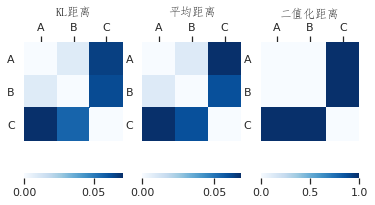

In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

# cfont= mpl.font_manager.FontProperties(fname='/home/qinziwei/FangSong.ttf')
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
sns.set(font='FangSong')  # 解决Seaborn中文显示问题

ticklabels = ['A','B','C']
titles = ['KL距离','平均距离','二值化距离']
f = plt.figure()
for i in range(3):
    mat = mat_list[i]
    f.add_subplot(1,3,i+1)
    subp = sns.heatmap(mat,cmap='Blues',fmt=".2f",square=True,xticklabels=ticklabels,yticklabels=ticklabels,cbar_kws={"orientation":"horizontal",'shrink':1})
    subp.xaxis.tick_top()
    subp.set_yticklabels(subp.get_yticklabels(),rotation=0)
    subp.set_title(titles[i],fontproperties=cfont)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


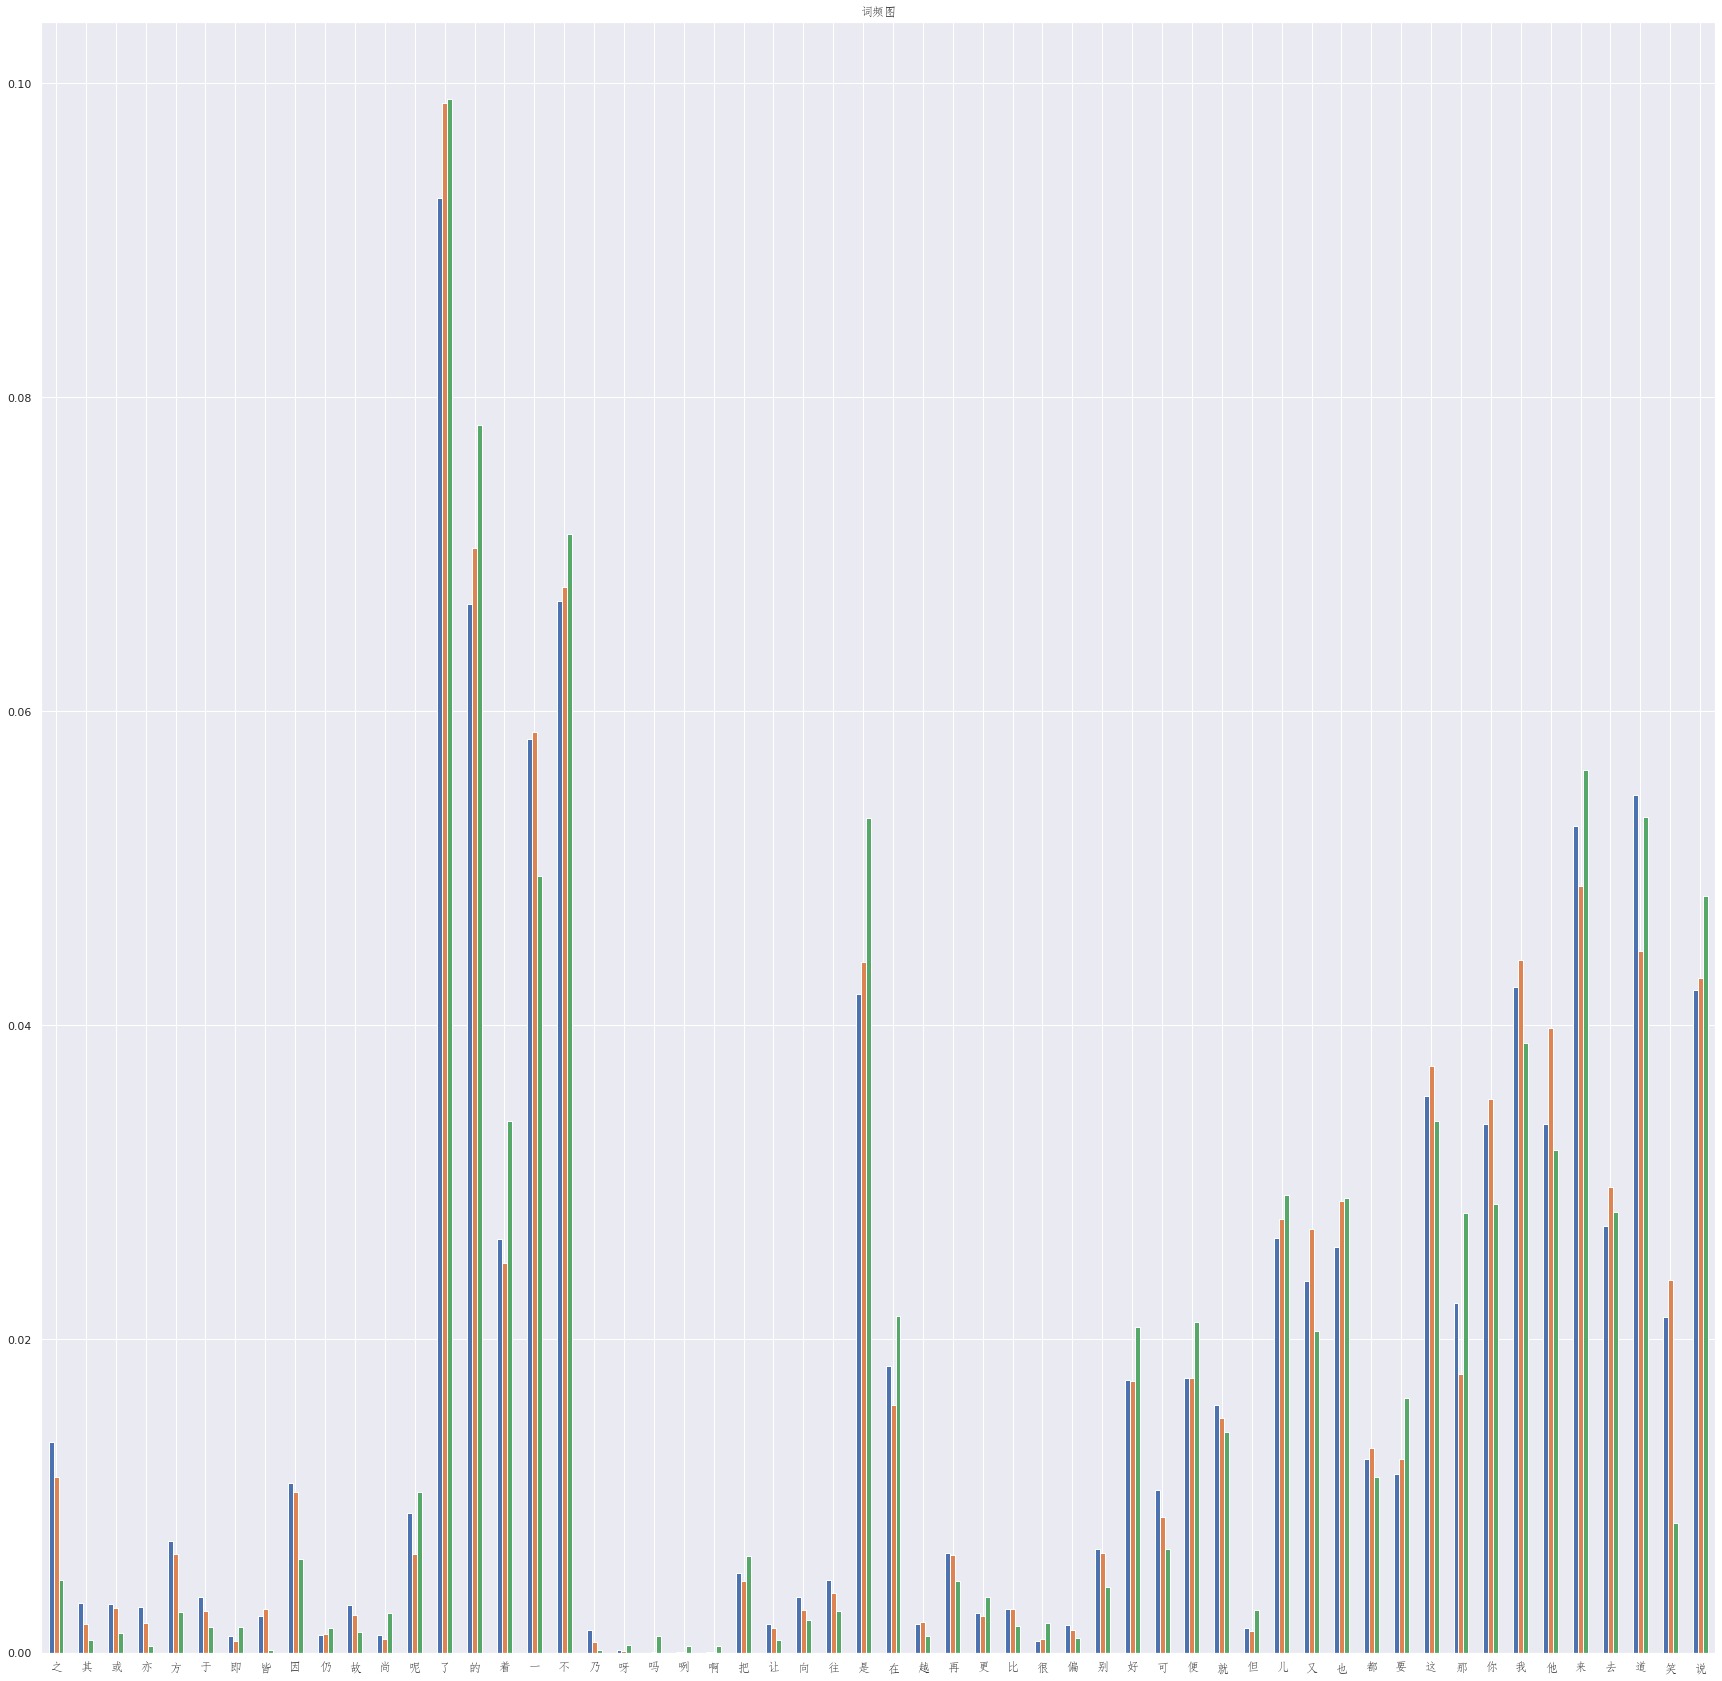

In [98]:
import matplotlib as mpl
import pylab as pl
import pandas as pd

pl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
pl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
word_freq = {}

for w in word_list:
    fl = []
    for i in range(len(freq_list)):
        fl.append(freq_list[i][w])
    word_freq[w] = fl
    
df = pd.DataFrame(word_freq)
df.index = ['A','B','C']
df = df.T
ax = df.plot(kind='bar',legend=False,figsize=(30,30))
ax.set_title("词频图",fontproperties=cfont)
ax.set_xticklabels(ax.get_xticklabels(),fontproperties=cfont,rotation=360)
fig = ax.get_figure()
fig.show()

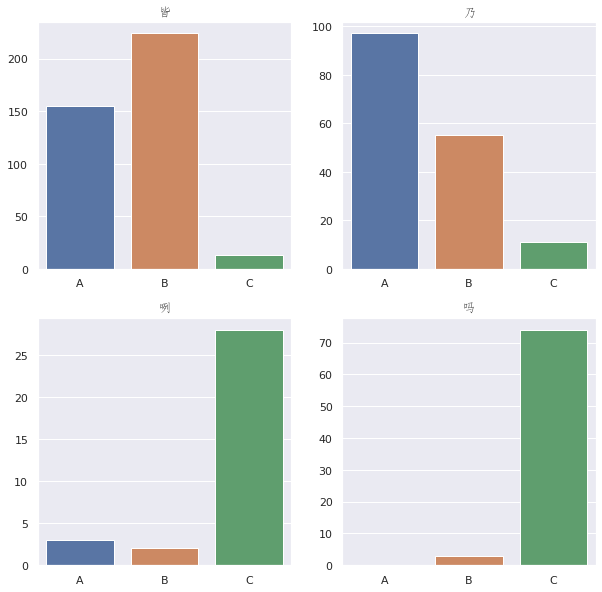

In [149]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
pl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
freq_list = {}

word_sublist = ['皆','乃','咧','吗']
word_count = {}
for w in word_sublist:
    fl = []
    for i in range(len(count_list)):
        fl.append(count_list[i][w])
    word_count[w] = fl
    
df = pd.DataFrame(word_count)
df.index = ['A','B','C']
df = df.T
fig = plt.figure(figsize=(10,10))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    subdf = df[i:i+1]
    ax = sns.barplot(data=subdf)
    ax.set_title(subdf.index[0],fontproperties = cfont)
fig.show()